In [1]:
import pandas as pd
import numpy as np 
import datetime
import os, glob
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
path_csv='./setimana'
colum=['DATE', 'VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'JP', 'CNT','STS', 'MIN', 'POWER', 'AUTOBCKLIGHT', 'CURRLIGHT', 'BRIGHTNESS',
       'PAN1VOLT', 'PAN1CURR', 'BCK1VOLT', 'BCK1CURR', 'RSSI', 'time','date','Batt_id']
my_Data=pd.DataFrame(columns=colum)
for i, file in enumerate(glob.glob(path_csv+"/*.csv")):
    #print(file)
    DF= pd.read_csv(file, sep=';')
    my_Data=my_Data.append(DF,ignore_index=True)

C:\Users\bmakh\anaconda3\envs\Spark\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
my_Data = my_Data.rename({'Batt_id': 'host_id'}, axis='columns')
my_Data.head(4)

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,JP,CNT,STS,...,BRIGHTNESS,PAN1VOLT,PAN1CURR,BCK1VOLT,BCK1CURR,RSSI,time,date,host_id,Unnamed: 0
0,2020-11-03 00:00:01,29237,602,28890,29135,588,230,OFF,595355,1,...,0.0,11916.0,510.0,24036.0,419.0,-85.0,00:00:01,2020-11-03,814U01M70009,0.0
1,2020-11-03 00:01:00,29237,636,28890,29136,592,235,OFF,595356,1,...,0.0,11916.0,510.0,24036.0,419.0,-85.0,00:01:00,2020-11-03,814U01M70009,1.0
2,2020-11-03 00:01:59,29238,613,28890,29138,593,235,OFF,595357,1,...,0.0,11916.0,510.0,24036.0,419.0,-87.0,00:01:59,2020-11-03,814U01M70009,2.0
3,2020-11-03 00:02:58,29238,611,28890,29141,523,230,OFF,595358,1,...,0.0,11916.0,510.0,24036.0,419.0,-87.0,00:02:58,2020-11-03,814U01M70009,3.0


In [5]:
my_Data['time']=[datetime.datetime.strptime(x,'%H:%M:%S').time() for x in my_Data['time']]
my_Data['time_sec']=[sum([x.hour*3600,x.minute*60,x.second]) for x in my_Data['time']]

In [6]:
### Code for host ID 
my_Data.host_id = pd.Categorical(my_Data.host_id)
my_Data['code_host_id'] = my_Data.host_id.cat.codes
### Code for date

In [7]:
my_Data["VIN"] = my_Data["VIN"].fillna(my_Data["VIN"].mean())
my_Data["VIN"]=my_Data["VIN"].astype(int)
my_Data["IIN"] = my_Data["IIN"].fillna(my_Data["IIN"].mean())
my_Data["IIN"]=my_Data["IIN"].astype(int)
my_Data["VOUT"] = my_Data["VOUT"].fillna(my_Data["VOUT"].mean())
my_Data["VOUT"]=my_Data["VOUT"].astype(int)
my_Data["VBATT"] = my_Data["VBATT"].fillna(my_Data["VBATT"].mean())
my_Data["VBATT"]=my_Data["VBATT"].astype(int)
my_Data["IBATT"] = my_Data["IBATT"].fillna(my_Data["IBATT"].mean())
my_Data["IBATT"]=my_Data["IBATT"].astype(int)
my_Data["TEMP"] = my_Data["TEMP"].fillna(my_Data["TEMP"].mean())
my_Data["TEMP"]=my_Data["TEMP"].astype(int)
my_Data["CNT"] = my_Data["CNT"].fillna(my_Data["CNT"].mean())
my_Data["CNT"]=my_Data["CNT"].astype(int)
my_Data["POWER"] = my_Data["POWER"].fillna(my_Data["POWER"].mean())
my_Data["POWER"]=my_Data["POWER"].astype(int)

<AxesSubplot:title={'center':'dataset totale'}>

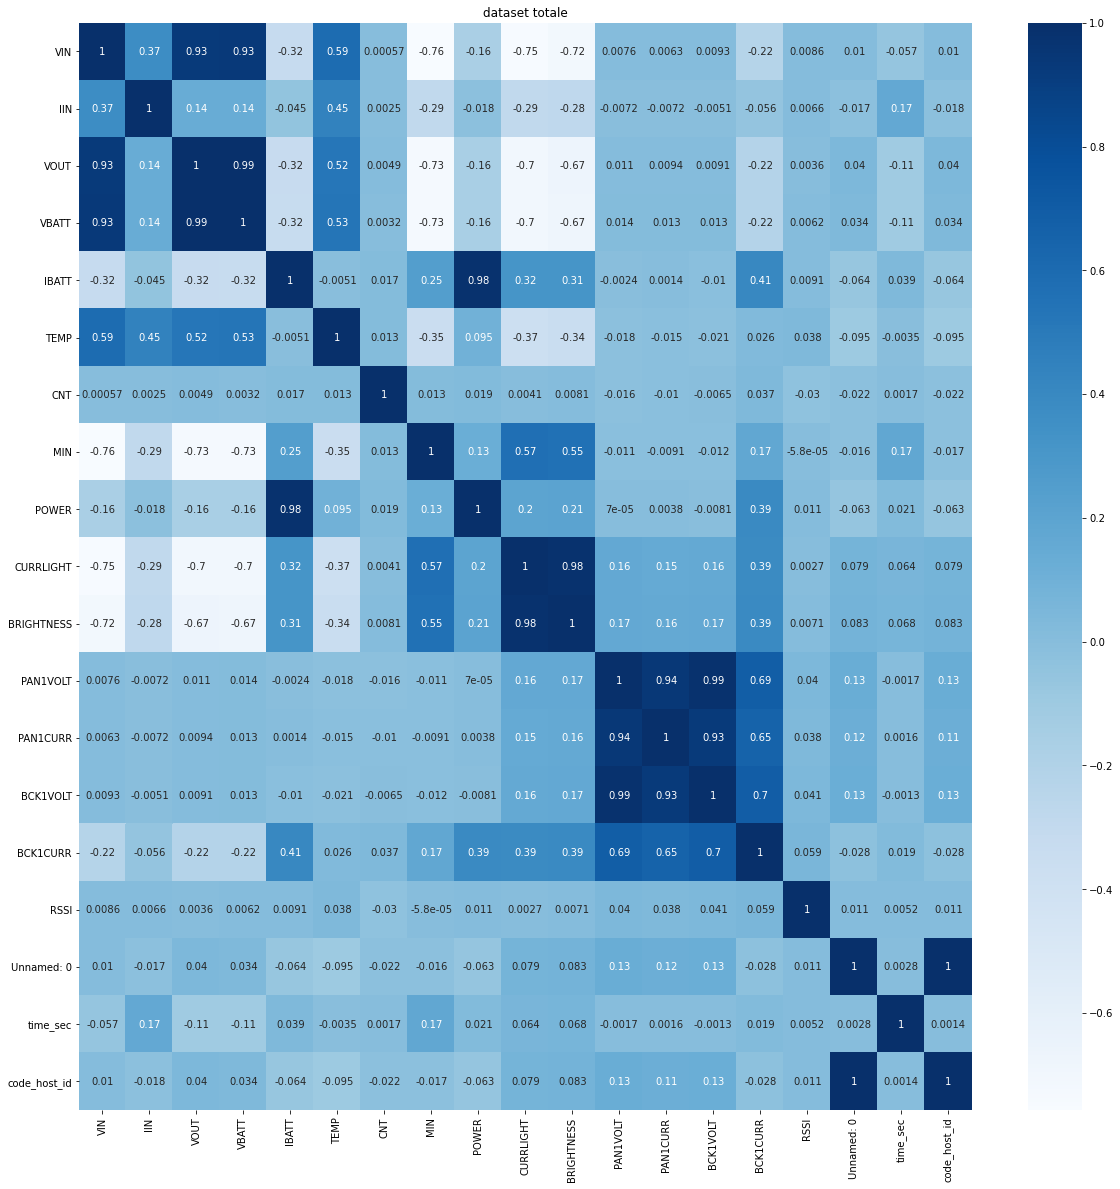

In [8]:
# master_table correlation matrix 
# calculate the correlation matrix
corr = my_Data.corr()
# plot the heatmap
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('dataset totale')
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, annot=True, cmap= 'Blues',ax=ax)

In [ ]:
# !pip install pca

In [ ]:
import pca
print(pca.__version__)

In [ ]:
from pca import pca

## Imposing the number of important componenets 

In [9]:
New_DF=my_Data[['VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'CNT', 'POWER', 'time_sec', 'code_host_id']]
New_DF.shape[0]

992107

In [ ]:
# Initialize
model = pca(n_components=4, normalize=True)
# Fit transform
out = model.fit_transform(New_DF)

In [ ]:
# Make plot with only the directions (no scatter)
#fig, ax = model.biplot(label=True, legend=False)

In [ ]:
# Make plot with only the directions (no scatter)
fig, ax = model.biplot(cmap=None, label=False, legend=False)

## To guess dimensions

In [ ]:
# Initialize to reduce the data up to the nubmer of componentes that explains 95% of the variance.
model = pca(n_components = 0.95, normalize=True) # capture 95% of the explained variance 

In [ ]:
results = model.fit_transform(New_DF)

In [ ]:
# Make plots
fig, ax = model.scatter()
fig, ax = model.plot()
fig, ax = model.biplot()
fig, ax = model.biplot(SPE=True, hotellingt2=True)

In [ ]:
# 3D plots
fig, ax = model.scatter3d()
fig, ax = model.biplot3d()
fig, ax = model.biplot3d(SPE=True, hotellingt2=True)

## Using the second method 

In [11]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_spd_matrix
from sklearn.preprocessing import StandardScaler

In [12]:
# rescale the data
X=New_DF.drop(['TEMP'],axis=1)
Y=New_DF['TEMP']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# perform the PCA
pca = PCA(n_components=None)
pca.fit(X)

# extract the smallest number of components which
# explain at least p% (e.g. 95%) of the variance
p = 0.95
n_components = 1 + np.argmax(np.cumsum(pca.explained_variance_ratio_) >= p)
print(n_components)
# 6

6


In [17]:
np.cumsum(pca.explained_variance_ratio_)>=p

array([False, False, False, False, False,  True,  True,  True,  True])

In [18]:
# extract the values of the selected components
Z = pca.transform(X)[:, :n_components]
print(Z.shape)

(992107, 6)


In [ ]:
Z

In [20]:
New_DF.columns

Index(['VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'CNT', 'POWER',
       'time_sec', 'code_host_id'],
      dtype='object')

In [23]:
col=['VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'CNT']

In [24]:
pd.DataFrame(data=Z, columns=col)

,VIN,IIN,VOUT,VBATT,IBATT,CNT
0,-1.681548,0.310215,-1.296107,-2.349952,0.541697,0.686344
1,-1.670826,0.344703,-1.283146,-2.346639,0.540330,0.698200
2,-1.665758,0.350678,-1.291890,-2.345776,0.539278,0.686102
3,-1.914997,-0.189756,-1.242618,-2.397911,0.568455,0.702634
4,-1.834557,-0.021481,-1.260495,-2.381371,0.558809,0.690577
...,...,...,...,...,...,...
992102,-1.363414,0.560356,0.885620,2.448556,-0.478672,-1.377675
992103,-1.477965,0.326419,0.928709,2.425818,-0.465111,-1.350124
992104,-1.768636,-0.305601,0.982308,2.364860,-0.431136,-1.334388
992105,-1.880597,-0.564591,0.989674,2.340223,-0.418179,-1.344797


In [26]:
X

array([[ 0.86263128, -0.08148547,  0.80255942, ..., -0.32609102,
        -1.73012467, -1.72959379],
       [ 0.86263128, -0.06006572,  0.80255942, ..., -0.3003374 ,
        -1.72775981, -1.72959379],
       [ 0.86270106, -0.07455555,  0.80255942, ..., -0.29373391,
        -1.72539496, -1.72959379],
       ...,
       [ 0.85279242, -0.03990596,  1.03039215, ..., -0.52199459,
         1.72624625,  1.72774038],
       [ 0.85279242, -0.06636565,  1.03039215, ..., -0.73286607,
         1.72865118,  1.72774038],
       [ 0.85279242, -0.04368591,  1.03039215, ..., -0.68179907,
         1.73101603,  1.72774038]])